<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>UTS | Pertemuan 8 | Segmentasi Gambar menggunakan K means</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
  <tr>
    <th>Hasil Pengerjaan</th>
    <td><p>
    Febrian Dani RTG<p>
</td>
  </tr>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

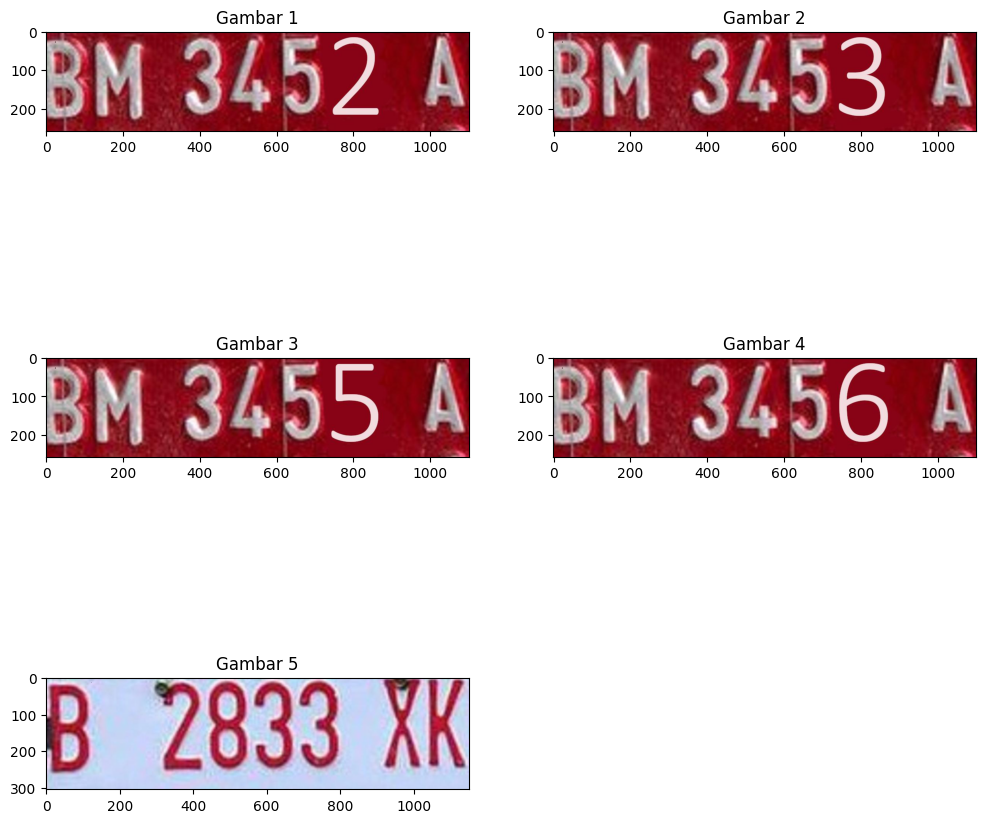

In [ ]:
# Load Gambar
img_list = []

# Load and append each image to the list
img_1 = cv2.imread('/content/drive/MyDrive/UTS/ML/44.jpg')
img_list.append(img_1)

img_2 = cv2.imread('/content/drive/MyDrive/UTS/ML/45.jpg')
img_list.append(img_2)

img_3 = cv2.imread('/content/drive/MyDrive/UTS/ML/46.jpg')
img_list.append(img_3)

img_4 = cv2.imread('/content/drive/MyDrive/UTS/ML/47.jpg')
img_list.append(img_4)

img_5 = cv2.imread('/content/drive/MyDrive/UTS/ML/22.jpg')
img_list.append(img_5)

plt.figure(figsize=(12, 12))

for i, img in enumerate(img_list):
    plt.subplot(3, 2, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar {i+1}")
    plt.axis('on')  # Optional, jika Anda ingin menghilangkan sumbu

plt.show()

In [ ]:
h1, w1, ch1= img_1.shape
h2, w2, ch2= img_2.shape
h3, w3, ch3= img_3.shape
h4, w4, ch4= img_4.shape
h5, w5, ch5= img_5.shape

data_list = []  # Ini akan berisi data setiap gambar

def process_image(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

# Loop untuk mengolah setiap gambar
for img in img_list:
    data = process_image(img)
    data_list.append(data)

data_1, data_2, data_3, data_4, data_5 = data_list

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

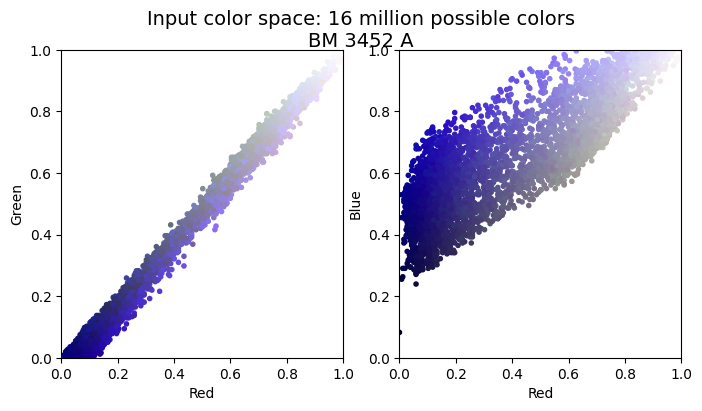

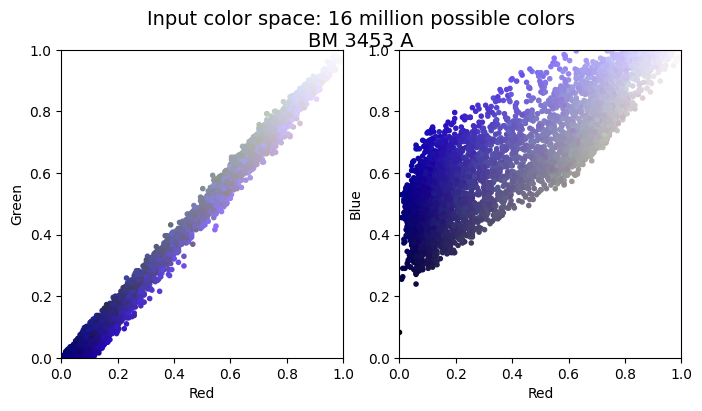

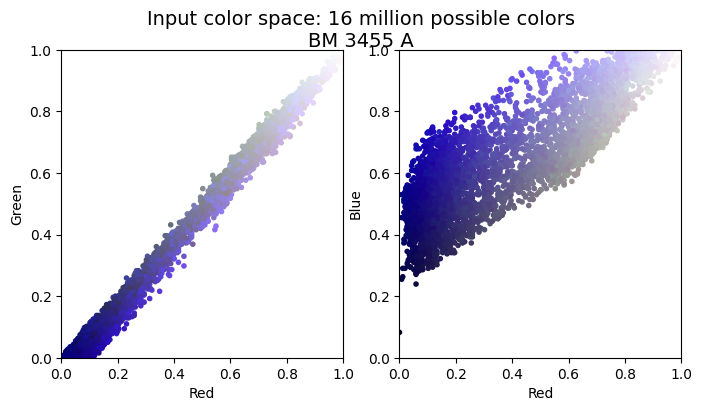

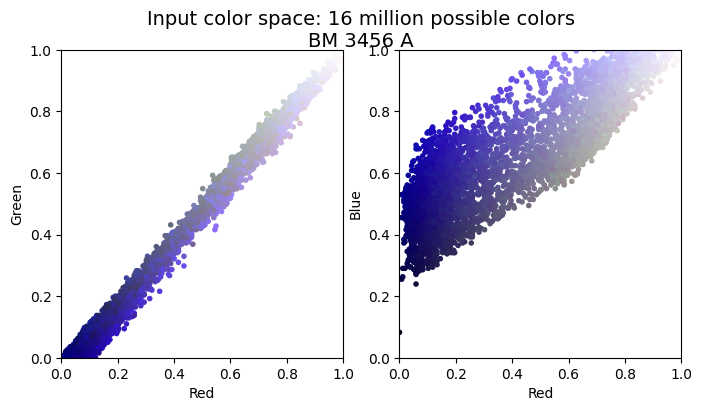

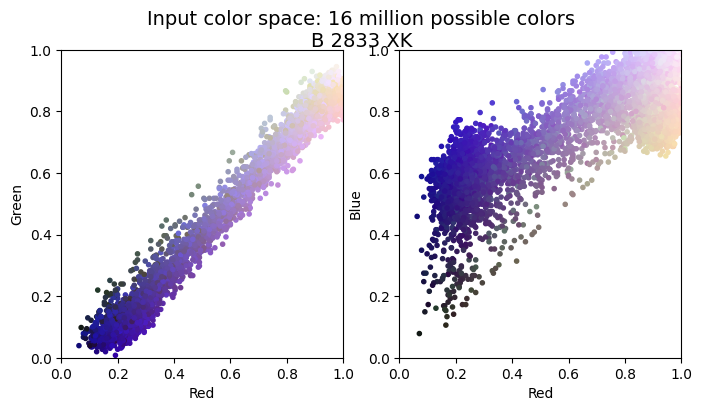

In [ ]:
title = 'Input color space: 16 million possible colors'
description = 'BM 3452 A'
plot_pixels(data_1, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3453 A'
plot_pixels(data_2, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3455 A'
plot_pixels(data_3, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3456 A'
plot_pixels(data_4, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'B 2833 XK'
plot_pixels(data_5, title + '\n' + description)

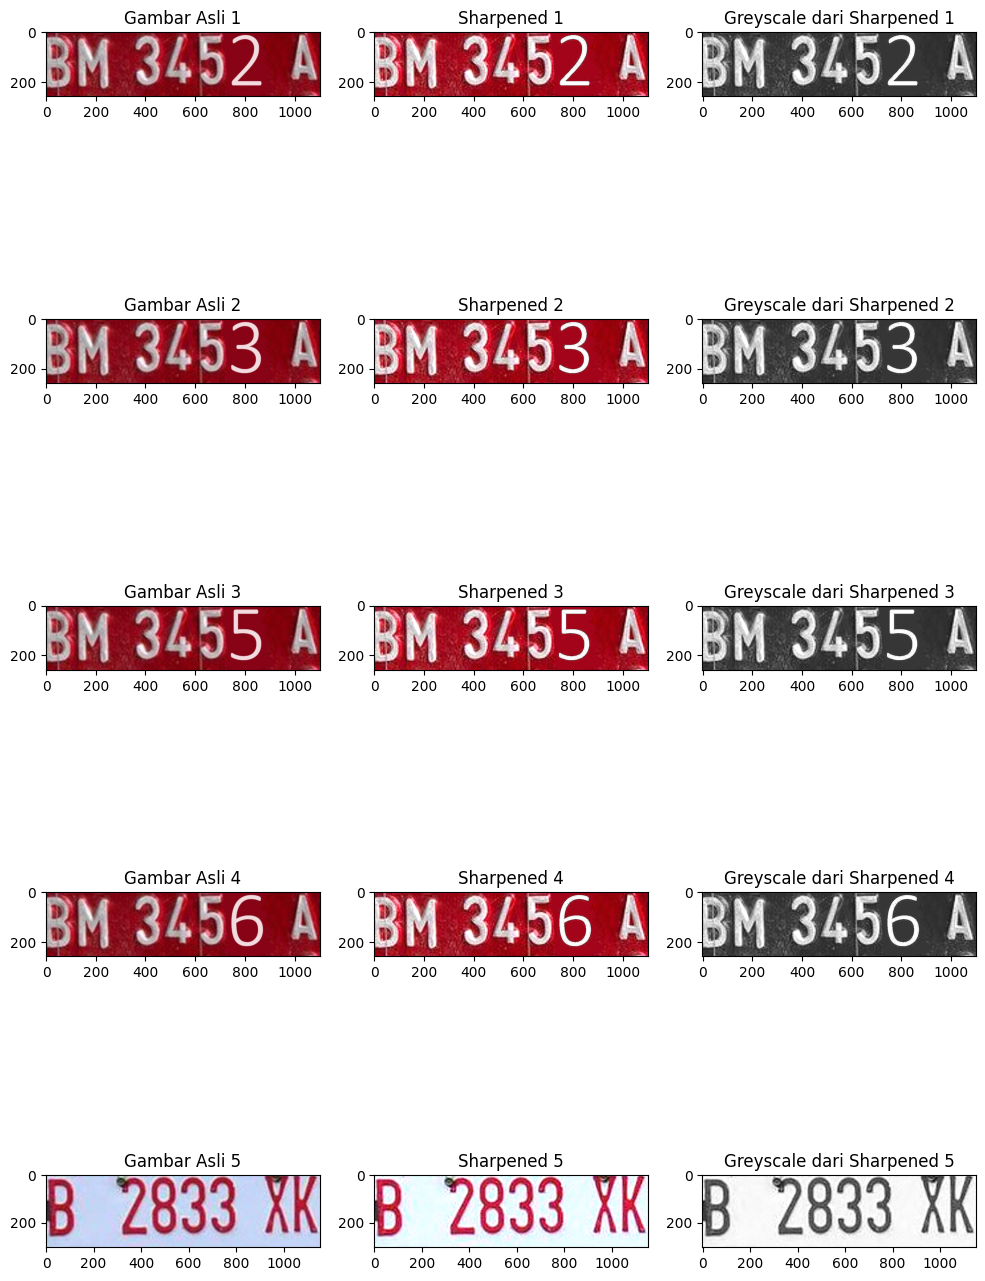

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Anda harus memiliki img_1 hingga img_5 sebelum menjalankan perulangan ini.
img_list = [img_1, img_2, img_3, img_4, img_5]

data_list = []

# Tentukan ukuran gambar
plt.figure(figsize=(12, 18))

# Loop untuk menampilkan perbandingan gambar
for i, img in enumerate(img_list):
    # Konversi citra ke citra skala abu-abu
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Tampilkan gambar asli di sebelah kiri
    plt.subplot(5, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar Asli {i+1}")
    plt.axis('on')

    # Tampilkan gambar yang telah di-sharpen di tengah
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sharpening_filter = np.array([[-1, -1, -1],
                                  [-1, 9.2, -1],
                                  [-1, -1, -1]], dtype=np.float32)
    sharpened_image = cv2.filter2D(img_rgb, -1, sharpening_filter)

    plt.subplot(5, 3, i * 3 + 2)
    plt.imshow(sharpened_image)
    plt.title(f"Sharpened {i+1}")
    plt.axis('on')

    # Tampilkan citra skala abu-abu dari gambar yang telah di-sharpen di sebelah kanan
    grey_sharpened_image = cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2GRAY)

    plt.subplot(5, 3, i * 3 + 3)
    plt.imshow(grey_sharpened_image, cmap='gray')
    plt.title(f"Greyscale dari Sharpened {i+1}")
    plt.axis('on')
    data_list.append(grey_sharpened_image)

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

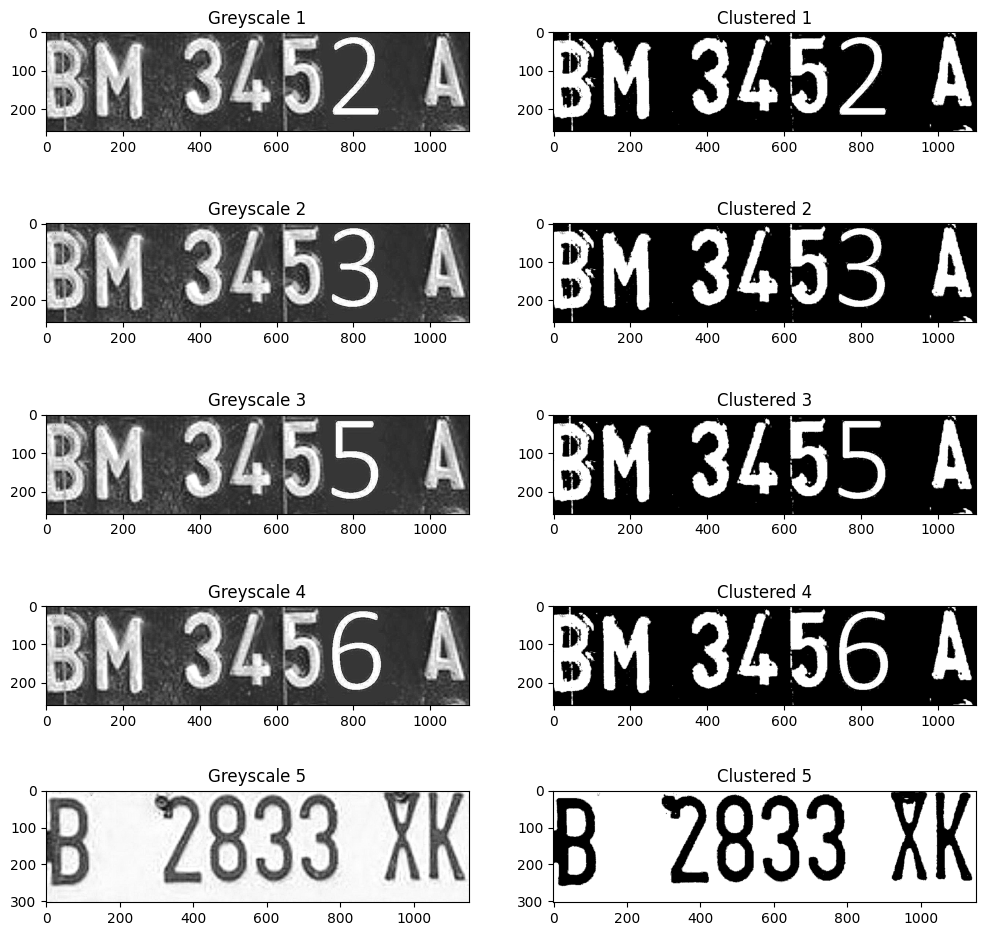

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

data_list_cl = []
num_clusters = 2  # Jumlah cluster yang Anda inginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clustered_data = []

for grey_sharpened_image in data_list:
    h, w = grey_sharpened_image.shape
    flattened_data = grey_sharpened_image.reshape(-1, 1)  # Mengubah citra menjadi vektor 1D
    kmeans.fit(flattened_data)
    clustered_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)
    data_list_cl.append(clustered_img)

plt.figure(figsize=(12, 12))
for i, clustered_img in enumerate(data_list_cl):
    plt.subplot(5, 2, i*2+1)
    plt.imshow(data_list[i], cmap='gray')
    plt.title(f"Greyscale {i+1}")
    plt.axis('on')

    plt.subplot(5, 2, i*2+2)
    plt.imshow(clustered_img, cmap='gray')
    plt.title(f"Clustered {i+1}")
    plt.axis('on')

plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Menyembunyikan peringatan yang tidak diperlukan
warnings.filterwarnings("ignore")

data_list_cl = []
num_clusters = 2  # Jumlah cluster yang Anda inginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clustered_data = []

inertia_values = []
silhouette_scores = []

for grey_sharpened_image in data_list:
    h, w = grey_sharpened_image.shape
    flattened_data = grey_sharpened_image.reshape(-1, 1)  # Mengubah citra menjadi vektor 1D
    kmeans.fit(flattened_data)
    clustered_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)
    data_list_cl.append(clustered_img)

    # Menghitung inertia dan silhouette score
    inertia = kmeans.inertia_
    silhouette = silhouette_score(flattened_data, kmeans.labels_)
    inertia_values.append(inertia)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 12))
for i, (clustered_img, inertia, silhouette) in enumerate(zip(data_list_cl, inertia_values, silhouette_scores)):
    plt.subplot(5, 3, i * 3 + 1)
    plt.imshow(data_list[i], cmap='gray')
    plt.title(f"Greyscale {i + 1}")
    plt.axis('on')

    plt.subplot(5, 3, i * 3 + 2)
    plt.imshow(clustered_img, cmap='gray')
    plt.title(f"Clustered {i + 1}")
    plt.axis('on')

    plt.subplot(5, 3, i * 3 + 3)
    plt.text(0.5, 0.5, f"Inertia: {inertia:.2f}\nSilhouette: {silhouette:.2f}", ha='center', va='center')
    plt.axis('off')

plt.show()
